# Bluffing detector

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Position_Salaries.csv")

In [3]:
print(dataset.info())
print("\n")
print(dataset.head())
print("\n")
print(dataset.tail())
print("\n")
print(dataset.describe())
print("\n")
print(dataset["Position"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None


            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


         Position  Level   Salary
5  Region Manager      6   150000
6         Partner      7   200000
7  Senior Partner      8   300000
8         C-level      9   500000
9             CEO     10  1000000


          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


Junior Consultant    1
Senior Pa

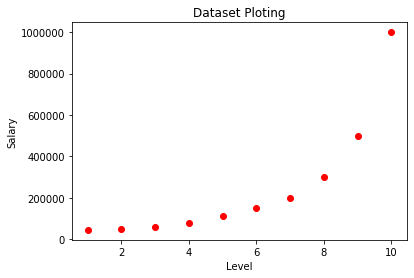

In [4]:
plt.scatter(dataset["Level"],dataset["Salary"], color = "red")
plt.title('Dataset Ploting')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [5]:
X = dataset.iloc[:,1:2].values
Y = dataset.iloc[:,-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
# Fiting linear regression in datastet
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Fitting Polynomial Regression in dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [29]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

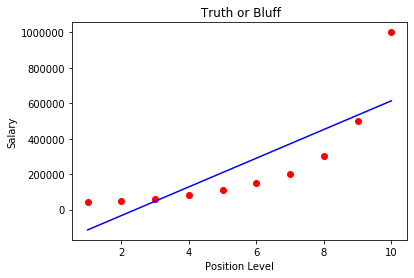

In [30]:
# Visualising the linear Regression result
plt.scatter(X, Y, color="red")
plt.plot(X, lin_reg.predict(X), color="blue")
plt.title(" Truth or Bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

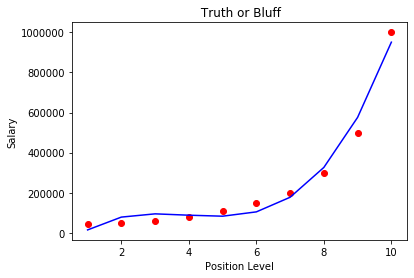

In [27]:
# Visualising the Polynomial Regression result
plt.scatter(X, Y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color="blue")
plt.title(" Truth or Bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

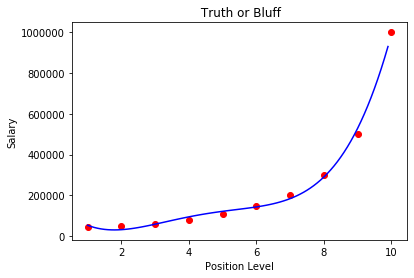

In [35]:
#for more accurate curve
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, Y, color="red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color="blue")
plt.title(" Truth or Bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [39]:
# Predicting using result of Linear Regression
lin_reg.predict([[6.5]])

array([330378.78787879])

In [41]:
# Predicting using result of Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[.5]]))

array([100479.58551891])